In [39]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/qm/y3ntm4w54lv2x8p86n_p1ml80000gn/T/ipykernel_39046/2884596146.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


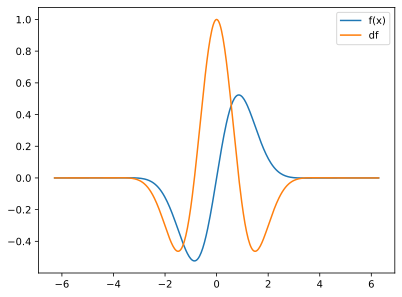

In [40]:
#the function
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*0.5)

#and its derivative
df = np.cos(x) * np.exp(-x**2*0.5) + np.sin(x) * (-1.*x) * np.exp(-x**2*0.5)

#quick plot for inspection
plt.plot(x,fx,x,df)
plt.legend(['f(x)','df'])

In [41]:
#function (note: over-writing variable names)
def fx(x):
    return np.sin(x) * np.exp(-x**2*0.05)

#derivative function
def deriv(x):
    return np.cos(x) * np.exp(-x**2*0.5) - np.sin(x) * 0.1*x*np.exp(-x**2*0.5)

Text(0.5, 1.0, 'Empirical local minimum: -1.3784837947374724')

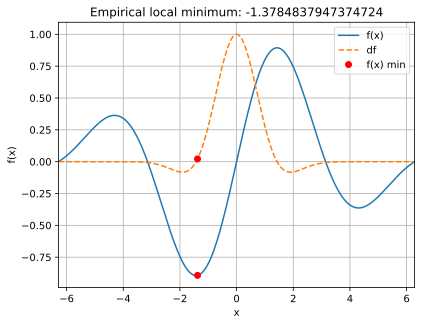

In [42]:
#random-satrting point
localmin = np.random.choice(x,1) #np.array([6])

#learning parameters
learning_rate = 0.01
training_epochs = 100

#run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad
    
#plot the results
plt.plot(x,fx(x),x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s' %localmin[0] )

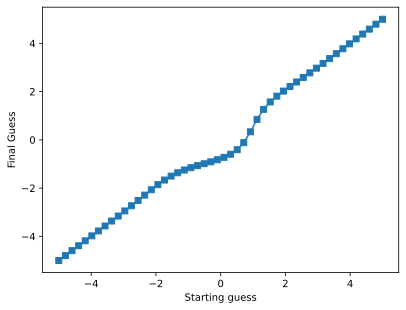

In [43]:
#Run parametric experiments

#Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

#loop over starting points
for idx,localmin in enumerate(startlocs):

    #run through training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate * grad
        
    #store the final guess
    finalres[idx] = localmin
    
#plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final Guess')
plt.show()

In [44]:
'''
We can see that when we get values anywhere between approximately -4 and
2 we get get to local minima. If we exceed 1.5 we will get to local minima.
This is what the graph above demonstrates.
'''

'\nWe can see that when we get values anywhere between approximately -4 and\n2 we get get to local minima. If we exceed 1.5 we will get to local minima.\nThis is what the graph above demonstrates.\n'

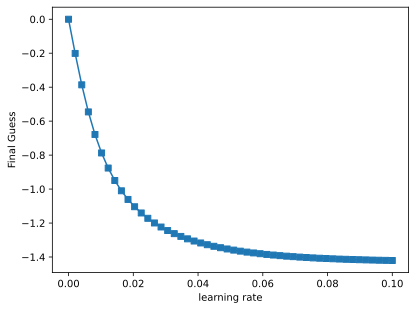

In [45]:
#Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

#loop over learning rates
for idx, learningRate in enumerate(learningrates):
    
    #force starting guess to 0.
    localmin = 0
    
    #run through training
    for i in range(training_epochs):
        grad=deriv(localmin)
        localmin = localmin - learningRate * grad
        
    #store the final guess
    finalres[idx] = localmin
    
plt.plot(learningrates,finalres,'s-')
plt.xlabel('learning rate')
plt.ylabel('Final Guess')
plt.show()

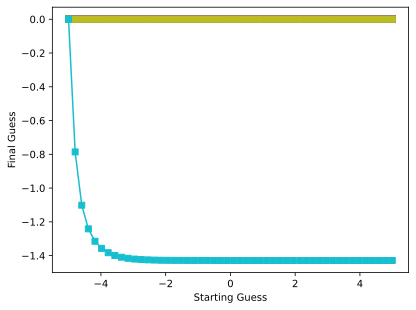

In [46]:
#Experiment 3: Interaction between learning rate and training epochs

#setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

#initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

#loop over the learning rates
for Lidx,learningRate in enumerate(learningrates):
    
    #loop over training epochs
    for Eidx,trainEpochs in enumerate(training_epochs):
        
        #run through training (again fixing starting location)
        localmin=0
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin - learningRate * grad
            
    #store the final guess
    finalres[Lidx,Eidx] = localmin
    
#plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting Guess')
plt.ylabel('Final Guess')
plt.show()

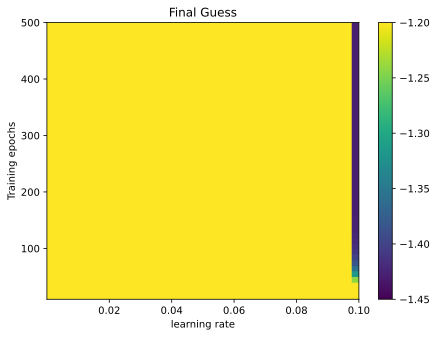

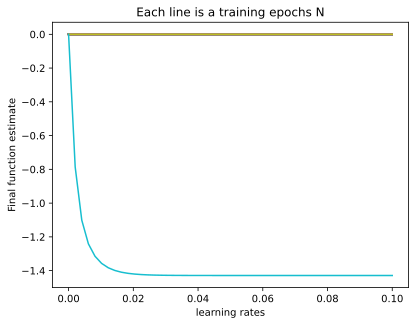

In [50]:
#plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres, extent=[learningrates[0], learningrates[-1], training_epochs[0], training_epochs[-1]],
           aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
plt.xlabel('learning rate')
plt.ylabel('Training epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()

#another visualization
plt.plot(learningrates,finalres)
plt.xlabel('learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()


In [48]:
'''
Here yellow means bad, we didnt get tolocal minimum and still approaching it.
dark blue means good.

We can see when the learningrate is high we get good result and also,
when no of training epochs we get good result.
'''

'\nHere yellow means bad, we didnt get tolocal minimum and still approaching it.\ndark blue means good.\n\nWe can see when the learningrate is high we get good result and also,\nwhen no of training epochs we get good result.\n'